## Illustration of Tranforms


In [4]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch 
import torchvision.transforms as T

%matplotlib inline

In [5]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('hedgehog.jpg')

In [6]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        #Make a 2d grid even if there's just 1 row
        imgs = [imgs]
    
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig,axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.array(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
            
    plt.tight_layout()

### Pad

Pad transform fills image borders with some pixel values.

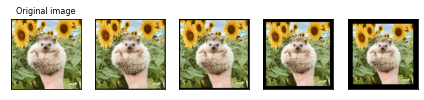

In [7]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

### Resize

Resize transform resizes an image

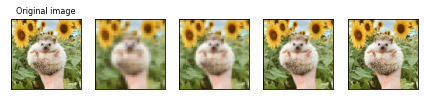

In [8]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

### CenterCrop

CenterCrop transform crops the given image at the center.

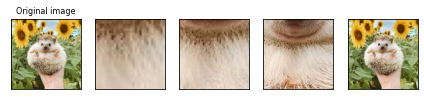

In [9]:
center_crops = [T.CenterCrop(size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

### FiveCrop

FiveCrop transform crops the given image into four corners and the central crop

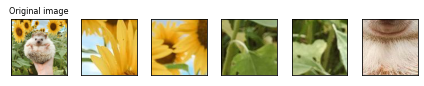

In [10]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100,100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

### Grayscale

Grayscale transform converts an image to grayscale.

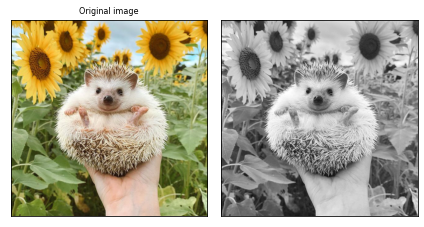

In [12]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

## Random transforms

The following transforms are random, which means the same transformer instance will produce different results each time it transforms a given image.

### ColorJitter

ColorJitter transform randomly changes the brightness, saturation, and other properties of an image.

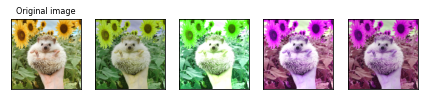

In [14]:
jitter = T.ColorJitter(brightness=0.5, hue=0.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur

In image processing, a Gaussian blur (also known as Gaussian smoothing) is the result of blurring an image by a Gaussian function.

It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. The visual effect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen, distinctly different from the bokeh effect produced by an out-of-focus lens or the shadow of an object under usual illumination.

Gaussian smoothing is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at different scales—see scale space representation and scale space implementation.

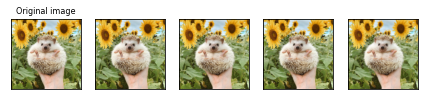

In [15]:
blurrer = T.GaussianBlur(kernel_size=(5,9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomPerspective

Performs a random perspective transformation of the given image with a given probability. If the image is torch Tensor, it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions.

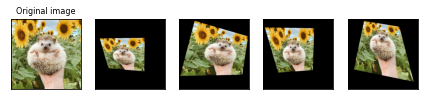

In [16]:
perspective_transformer = T.RandomPerspective(distortion_scale= 0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation

Rotate the image by angle. If the image is torch Tensor, it is expected to have […, H, W] shape, where … means an arbitrary number of leading dimensions.

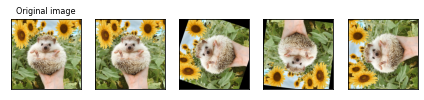

In [17]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine

In Euclidean geometry, an affine transformation, or an affinity (from the Latin, affinis, "connected with"), is a geometric transformation that preserves lines and parallelism (but not necessarily distances and angles).

More generally, an affine transformation is an automorphism of an affine space (Euclidean spaces are specific affine spaces), that is, a function which maps an affine space onto itself while preserving both the dimension of any affine subspaces (meaning that it sends points to points, lines to lines, planes to planes, and so on) and the ratios of the lengths of parallel line segments. Consequently, sets of parallel affine subspaces remain parallel after an affine transformation. An affine transformation does not necessarily preserve angles between lines or distances between points, though it does preserve ratios of distances between points lying on a straight line.

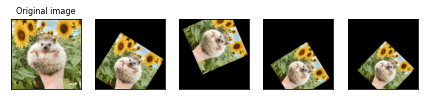

In [20]:
affine_transformer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop

Crops an image at a random locations.

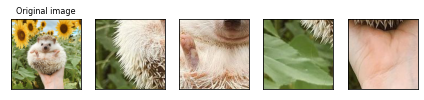

In [21]:
cropper = T.RandomCrop(size=(128,128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop

Crops an image at random location and then resizes the crop to a given size.

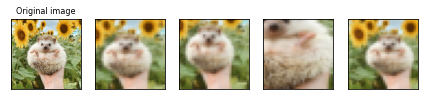

In [22]:
resize_cropper = T.RandomResizedCrop(size=(32,32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

### RandomInvert

Randomly inverts the colors of the given image.

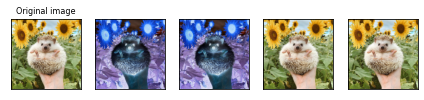

In [23]:
inverter = T.RandomInvert()
inverted_imgs = [inverter(orig_img) for _ in range(4)]
plot(inverted_imgs)

### RandomPosterize

Randomly posterizes the image by reducing the number of bits of each color channel.

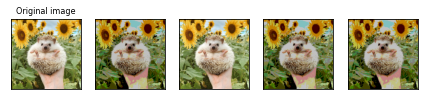

In [24]:
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

### RandomSolarize

Randomly solarizes the image by inverting all pixel values above the threshold.

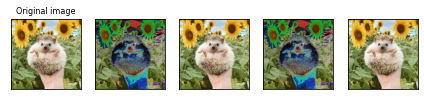

In [25]:
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness

Randomly adjusts the sharpness of the given image.

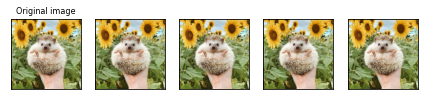

In [26]:
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandomAutocontrast

Randomly applies autocontrast to the given image.

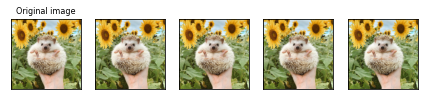

In [27]:
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize

Randomly equalizes the histogram of the given image.

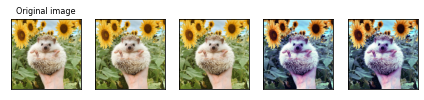

In [29]:
equalizer = T.RandomEqualize()
equalized_imgs =[equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

### AutoAugment

Automatically augments data based on a given auto-augmentation policy.

AutoAugment is a common Data Augmentation technique that can improve the accuracy of Image Classification models. Though the data augmentation policies are directly linked to their trained dataset, empirical studies show that ImageNet policies provide significant improvements when applied to other datasets.  In TorchVision we implemented 3 policies learned on the following datasets: ImageNet, CIFAR10 and SVHN. The new transform can be used standalone or mixed-and-matched with existing transforms.

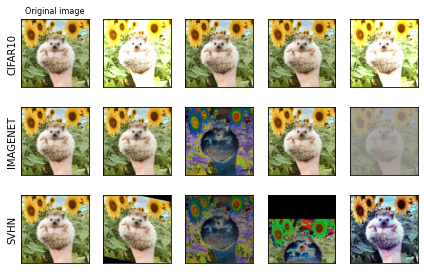

In [30]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

## Randomly-applied transforms

Some transforms are randomly-applied given a probability p. That is, the transformed image may actually be the same as the original one, even when called with the same transformer instance!

### RandomHorizontalFlip

Performs horizontal flip of an image, with a given probability.


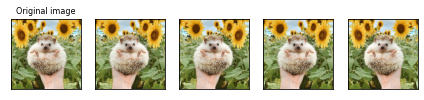

In [31]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip

Performs vertical flip of an image, with a given probability.

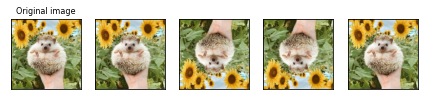

In [32]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomApply

Randomly applies a list of transforms, with a given probability.

In [ ]:
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64,64))], p=0.5)
transformed_imgs = [appli]